In [106]:
import math, warnings
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron, Lasso
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import IsolationForest
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')


In [107]:
df = pd.read_csv('mushrooms.csv')

In [108]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Data Understanding

In [109]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [111]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## Data Visualitation

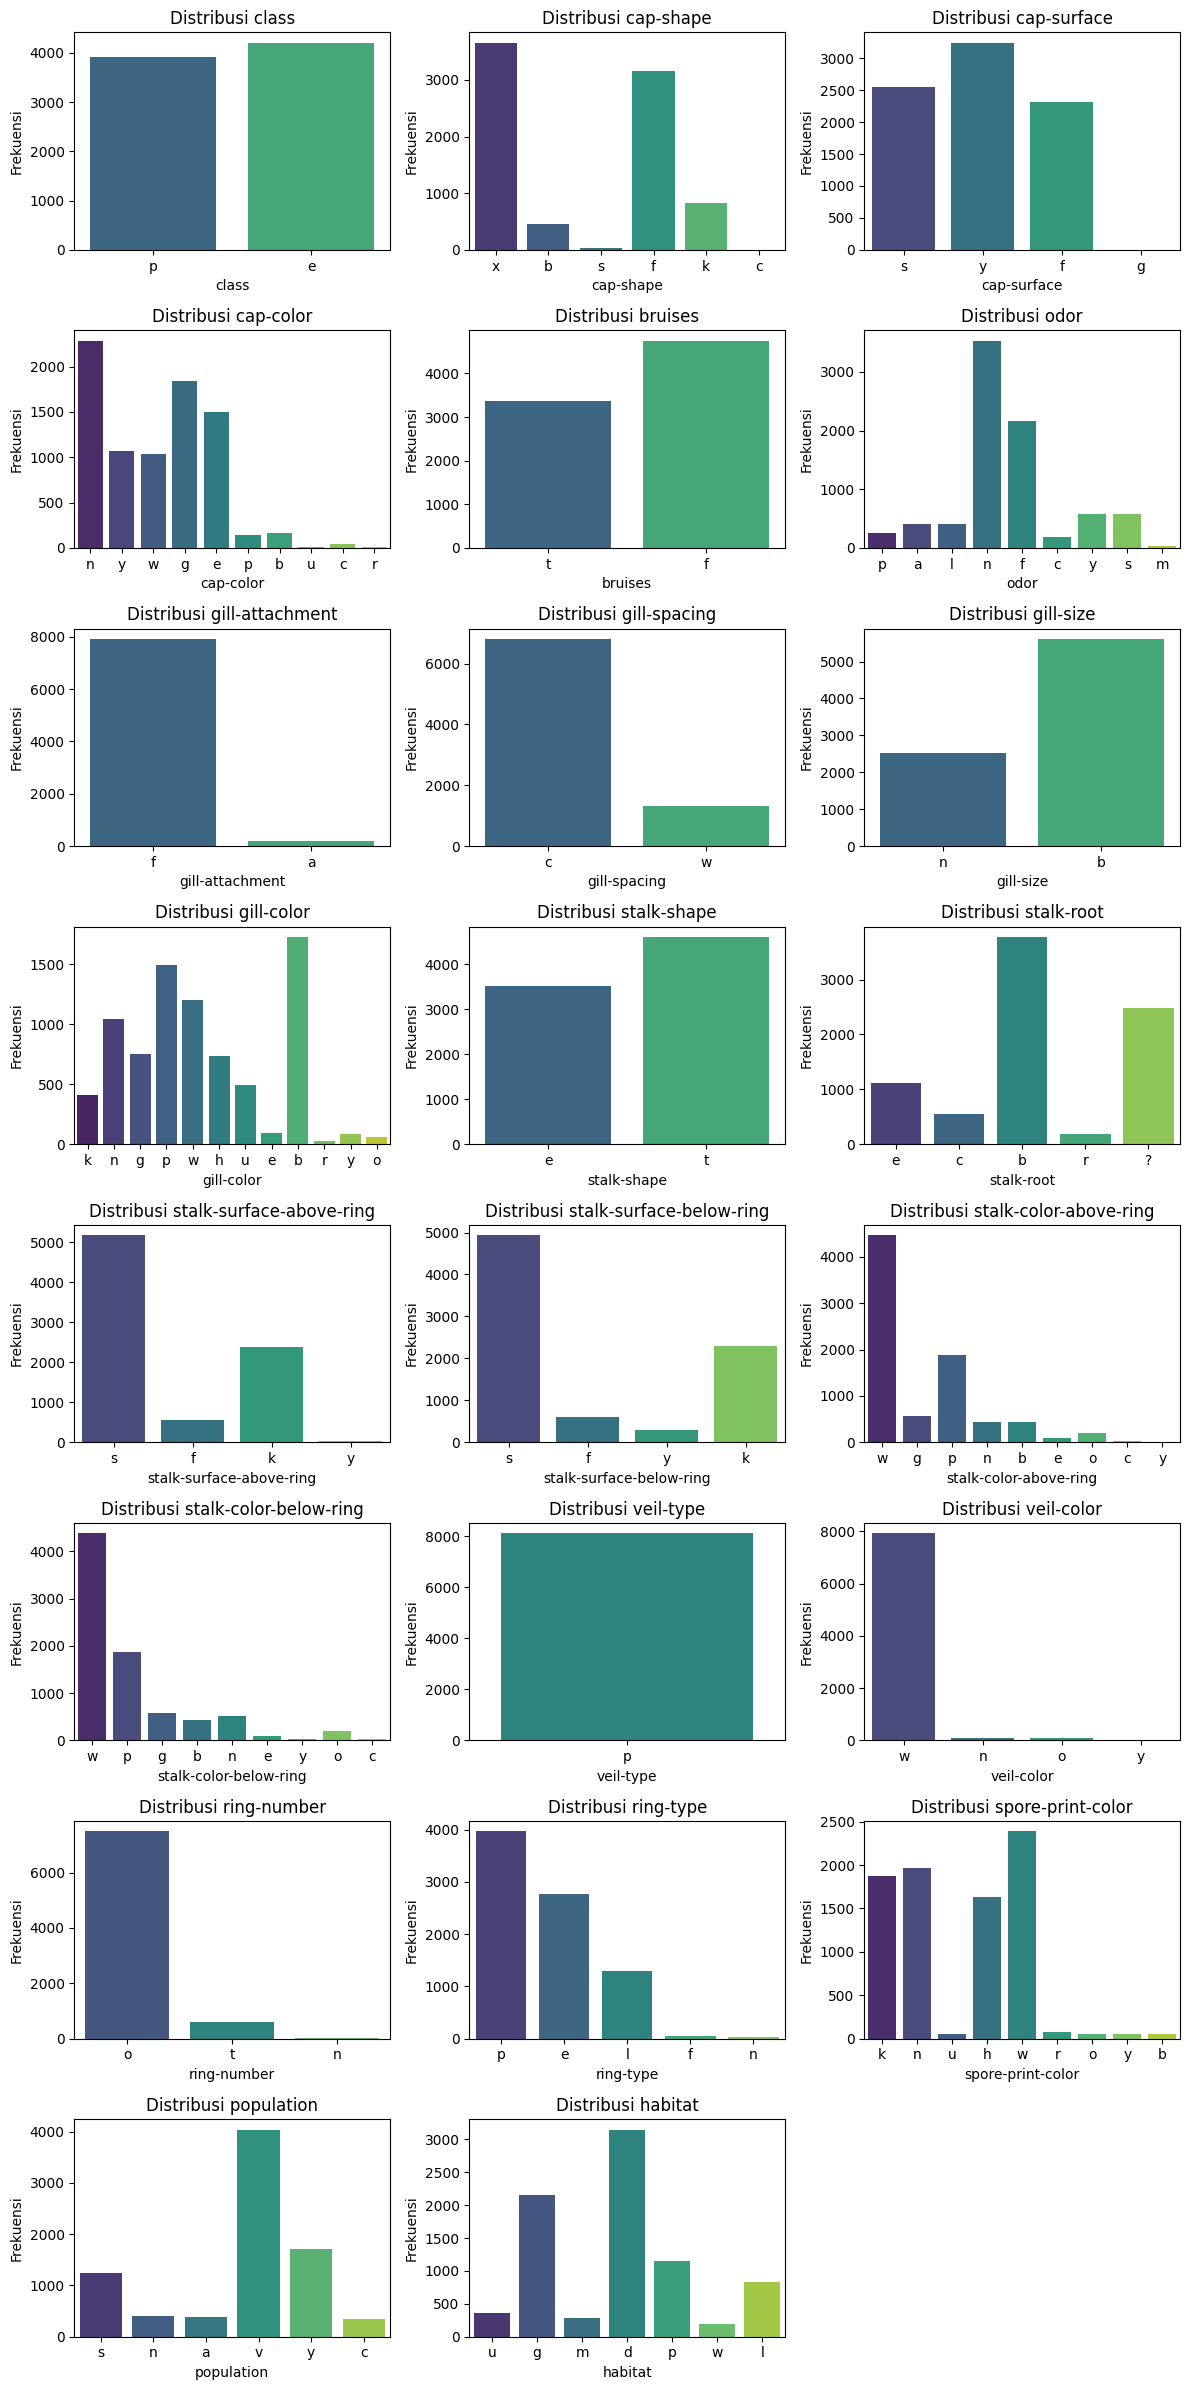

In [112]:
num_columns = len(df.columns)

cols = 3
rows = math.ceil(num_columns / cols)

plt.figure(figsize=(cols * 4, rows * 3))
for i, column in enumerate(df.columns, 1):
    plt.subplot(rows, cols, i)
    sns.countplot(x=df[column], palette='viridis')
    plt.title(f'Distribusi {column}')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

# Data Preprocessing

## Data Cleaning

In [113]:
df = df.drop(columns=['veil-type'])

## Data Transformation

In [114]:
label_map = {}
le = LabelEncoder()
for feature in df:
  df[feature] = le.fit_transform(df[feature])
  label_map[feature] = dict(zip(le.classes_, le.transform(le.classes_)))

In [115]:
for label in label_map.items():
  print (label)

('class', {'e': 0, 'p': 1})
('cap-shape', {'b': 0, 'c': 1, 'f': 2, 'k': 3, 's': 4, 'x': 5})
('cap-surface', {'f': 0, 'g': 1, 's': 2, 'y': 3})
('cap-color', {'b': 0, 'c': 1, 'e': 2, 'g': 3, 'n': 4, 'p': 5, 'r': 6, 'u': 7, 'w': 8, 'y': 9})
('bruises', {'f': 0, 't': 1})
('odor', {'a': 0, 'c': 1, 'f': 2, 'l': 3, 'm': 4, 'n': 5, 'p': 6, 's': 7, 'y': 8})
('gill-attachment', {'a': 0, 'f': 1})
('gill-spacing', {'c': 0, 'w': 1})
('gill-size', {'b': 0, 'n': 1})
('gill-color', {'b': 0, 'e': 1, 'g': 2, 'h': 3, 'k': 4, 'n': 5, 'o': 6, 'p': 7, 'r': 8, 'u': 9, 'w': 10, 'y': 11})
('stalk-shape', {'e': 0, 't': 1})
('stalk-root', {'?': 0, 'b': 1, 'c': 2, 'e': 3, 'r': 4})
('stalk-surface-above-ring', {'f': 0, 'k': 1, 's': 2, 'y': 3})
('stalk-surface-below-ring', {'f': 0, 'k': 1, 's': 2, 'y': 3})
('stalk-color-above-ring', {'b': 0, 'c': 1, 'e': 2, 'g': 3, 'n': 4, 'o': 5, 'p': 6, 'w': 7, 'y': 8})
('stalk-color-below-ring', {'b': 0, 'c': 1, 'e': 2, 'g': 3, 'n': 4, 'o': 5, 'p': 6, 'w': 7, 'y': 8})
('veil-col

| **Attribute**                  | **Values (Encoding)**                                                                                               |
|--------------------------------|----------------------------------------------------------------------------------------------------------------------|
| **class**                      | edible=e, poisonous=p                                                                                                |
| **cap-shape**                  | bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s                                                             |
| **cap-surface**                | fibrous=f, grooves=g, scaly=y, smooth=s                                                                             |
| **cap-color**                  | brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y                            |
| **bruises**                    | bruises=t, no=f                                                                                                      |
| **odor**                       | almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s                                 |
| **gill-attachment**            | attached=a, descending=d, free=f, notched=n                                                                         |
| **gill-spacing**               | close=c, crowded=w, distant=d                                                                                       |
| **gill-size**                  | broad=b, narrow=n                                                                                                   |
| **gill-color**                 | black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y        |
| **stalk-shape**                | enlarging=e, tapering=t                                                                                             |
| **stalk-root**                 | bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?                                               |
| **stalk-surface-above-ring**   | fibrous=f, scaly=y, silky=k, smooth=s                                                                               |
| **stalk-surface-below-ring**   | fibrous=f, scaly=y, silky=k, smooth=s                                                                               |
| **stalk-color-above-ring**     | brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y                                     |
| **stalk-color-below-ring**     | brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y                                     |
| **veil-type**                  | partial=p, universal=u                                                                                              |
| **veil-color**                 | brown=n, orange=o, white=w, yellow=y                                                                                |
| **ring-number**                | none=n, one=o, two=t                                                                                                |
| **ring-type**                  | cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z                                |
| **spore-print-color**          | black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y                               |
| **population**                 | abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y                                             |
| **habitat**                    | grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d                                                  |


In [116]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [117]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [118]:
df_nop = df

## Outlier

In [119]:
df_outlier = df
isf = IsolationForest(random_state=0, contamination=0.1)
outliers = isf.fit_predict(df) 
outlier_detected = np.where(df[outliers == -1])[0]
data_outlier = df.iloc[outlier_detected]

print (f"total outlier: {len(data_outlier)}")

total outlier: 12836


In [120]:
df = df[outliers == 1]

In [121]:
print (f"total data setelah outlier dihilangkan: {len(df)}")

total data setelah outlier dihilangkan: 7311


## Data Reduction (Feature Selection)

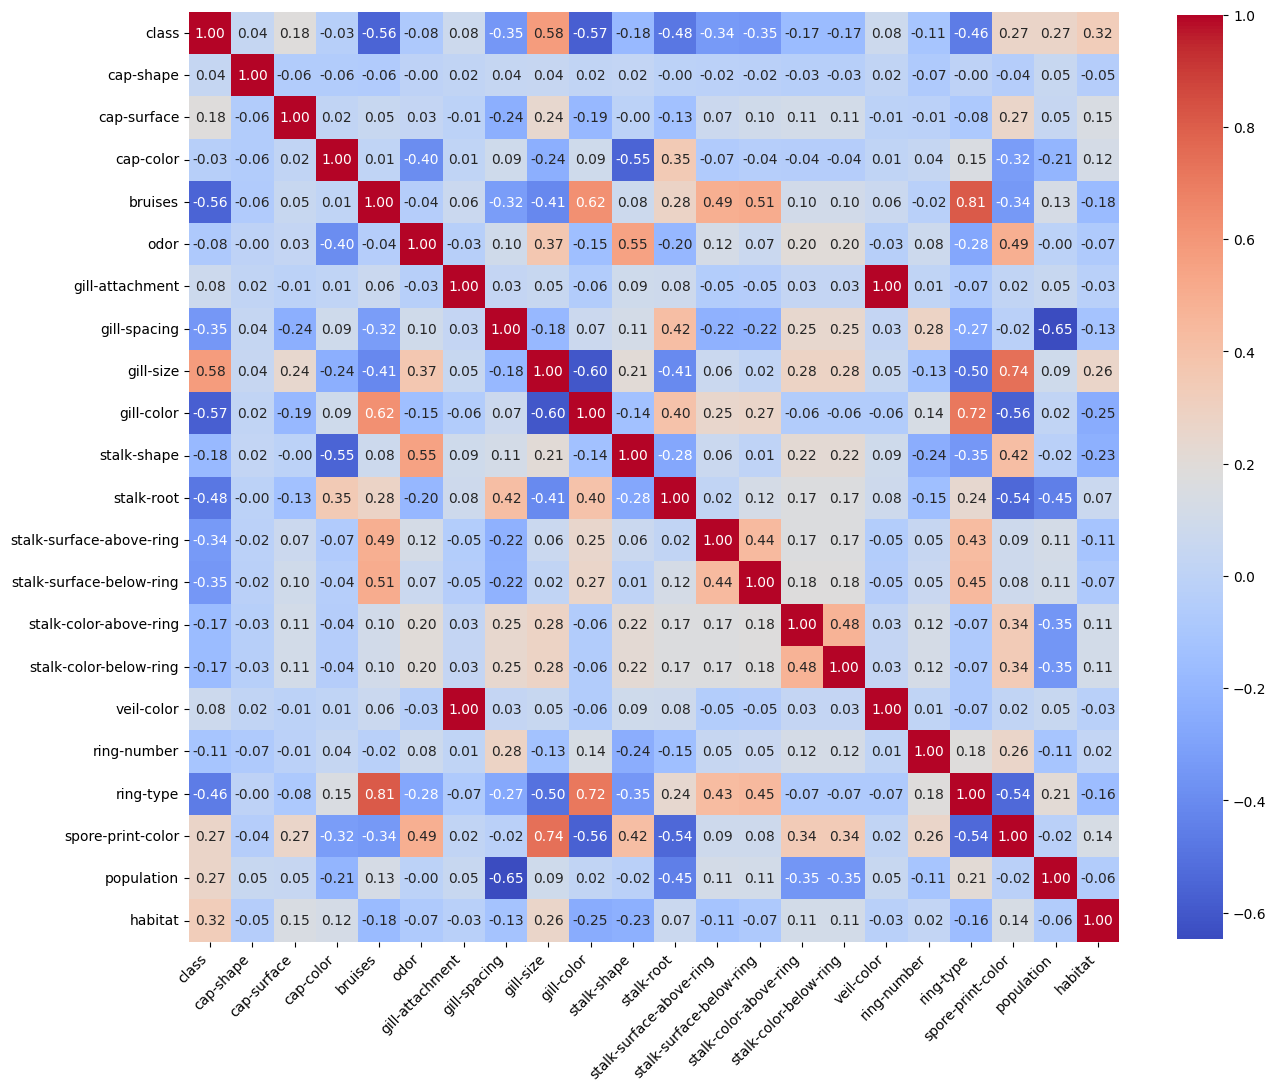

In [123]:
corr = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", square=True, cbar_kws={"shrink": 0.8})
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [124]:
X = df.drop(columns='class')
y = df['class']
df_nofs = df
info_gain = mutual_info_classif(X, y)
feature_selected = ['class']

threshold = 0.05
total = 0
print(f"Fitur dengan Information Gain di atas threshold {threshold}:\n")
for i, col in enumerate(X.columns):
    if info_gain[i] > threshold:
        feature_selected.append(col)
        print(f"[v]{col}: {info_gain[i]:.4f}")
        total += 1
    else:
        print(f"{col}: {info_gain[i]:.4f}")
print (f"Total fitur terseleksi: {total}\n")

Fitur dengan Information Gain di atas threshold 0.05:

[v]cap-shape: 0.0533
cap-surface: 0.0186
cap-color: 0.0370
[v]bruises: 0.1591
[v]odor: 0.6495
gill-attachment: 0.0034
[v]gill-spacing: 0.0774
[v]gill-size: 0.1916
[v]gill-color: 0.3022
stalk-shape: 0.0148
[v]stalk-root: 0.1765
[v]stalk-surface-above-ring: 0.2157
[v]stalk-surface-below-ring: 0.2301
[v]stalk-color-above-ring: 0.1656
[v]stalk-color-below-ring: 0.1761
veil-color: 0.0000
ring-number: 0.0037
[v]ring-type: 0.2397
[v]spore-print-color: 0.4044
[v]population: 0.1519
[v]habitat: 0.1187
Total fitur terseleksi: 15



In [125]:
df = df[feature_selected]

In [126]:
df.head()

,class,cap-shape,bruises,odor,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-type,spore-print-color,population,habitat
0,1,5,1,6,0,1,4,3,2,2,7,7,4,2,3,5
1,0,5,1,0,0,0,4,2,2,2,7,7,4,3,2,1
2,0,0,1,3,0,0,5,2,2,2,7,7,4,3,2,3
3,1,5,1,6,0,1,5,3,2,2,7,7,4,2,3,5
4,0,5,0,5,1,0,4,3,2,2,7,7,0,3,0,1


# Data Splitting

In [127]:
y = df['class']
X = df.drop(columns=['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

print (f"Jumlah Data Train: {len(X_train)}\nJumlah Data Test: {len(X_test)}")

Jumlah Data Train: 5848
Jumlah Data Test: 1463


# Modeling

In [128]:
model = Perceptron()

In [129]:
model.fit(X_train, y_train)

Perceptron()

In [130]:
y_pred = model.predict(X_test)

In [131]:
# import pickle
# pickle.dump(model, open("model.pkl", "wb"))

In [132]:
def eva(df):
    y = df['class']
    X = df.drop(columns=['class'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
    model = Perceptron()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print (acc)

# Evaluation

## Confusion Matrix

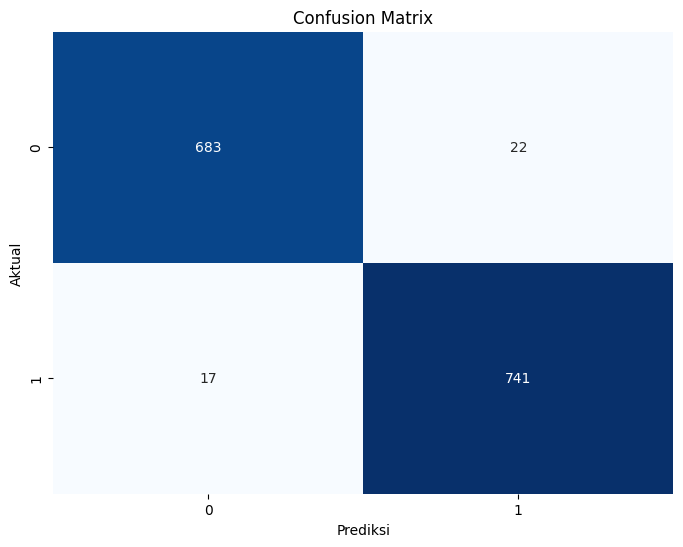

In [133]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix")
plt.show()

## Akurasi, Recall, Presisi, F1score

In [134]:
acc = accuracy_score(y_test, y_pred)
print ("Akurasi", acc)
rec = recall_score(y_test, y_pred)
print ("Recall", rec)
prec = precision_score(y_test, y_pred)
print ("Presisi", prec)
f1s = f1_score(y_test, y_pred)
print ("F1 Score", f1s)

Akurasi 0.9733424470266575
Recall 0.9775725593667546
Presisi 0.9711664482306684
F1 Score 0.9743589743589743


In [135]:
print ("akurasi data tanpa menghapus outlier")
eva(df_outlier)

akurasi data tanpa menghapus outlier
0.9421538461538461


## Model Comparison

In [137]:
print ("Perbandingan Akurasi dengan model lain")
classifiers = {
    "Perceptron": Perceptron(),
    "Naive Bayes": GaussianNB(),
}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train) 
    y_pred = clf.predict(X_test) 
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Akurasi: {accuracy:.4f}")

Perbandingan Akurasi dengan model lain
Perceptron Akurasi: 0.9733
Naive Bayes Akurasi: 0.9337
